# Assignment 1
In the following tasks of this exercise sheet we consider two humanoid robots, **H1** and **H2**, working in a household environment. H1 is equipped with a time-of-flight camera **C1** with a resolution of **640x480** pixels. In comparison, H2 uses a **1920x1080** pixel stereo camera **C2** to perceive the world.  Both cameras are mounted on the heads of the humanoids and are intrinsically and extrinsically calibrated.

1. **Homogenous Coordinates**
   a. Explain why Homogenous coordinates are beneficial compared to using  separate Euclidean rotation and translation matrices.

      ***Answer here in plain text***

   b. Discuss the specific implications this has for simplifying the process of chaining multiple transformations and inverting them, which are common requirements in robotic perception and control.
   
     ***Answer here in plain text***

2. **Calibration**
   a. In order to extend its application range, we decided to use H1 outdoors as well. However, due to the higher complexity of this domain, it was decided to replace its current camera with C2 in order to benefit from its higher camera resolution. Therefore, the two cameras need to be swapped. What kind of calibration should be done? **Justify your answer**.
   
   ***Answer here in plain text***

   b. As H1 was walking outside, he accidentally hit his head on a high hanging pole and the camera got dislodged. Fortunately, C2 suffered no external damage and was put back in place. What kind of calibration should be done in this case? **Justify your answer**.
   
   ***Answer here in plain text***


3. **Pinhole Projection**

a.	Write a function to derive the intrinsic matrix given the camera constant, principal point and pixel scaling factors.  **Print the resulting matrix**.

b.	Implement a function that takes as input 3D points in Euclidean coordinates, converts them to Homogenous coordinates and outputs their corresponding 2D image coordinates. **Visualize the 2D image coordinates on a scatter plot.**

[[800.   0. 320.]
 [  0. 800. 240.]
 [  0.   0.   1.]]
[[320. 240.]
 [480. 400.]
 [160. 400.]
 [480.  80.]
 [160.  80.]]


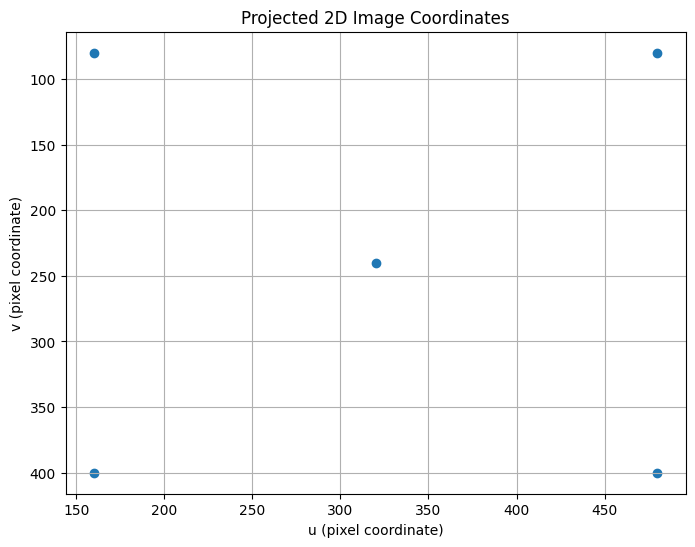

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def build_intrinsic_matrix(f, s_x, s_y, c_x, c_y):
    """
    Construct the intrinsic matrix K for the pinhole camera model.
    
    :return: 3x3 intrinsic matrix K
    """
    # TODO: Implement the intrinsic matrix
    K = np.array([[f/s_x, 0, c_x], 
                  [0, f/s_y, c_y], 
                  [0, 0, 1]])
    return K
    #pass

def project_points(points_3d, K):
    """
    Projects 3D points in the camera frame (in homogeneous coordinates) to 2D image coordinates using the intrinsic matrix K.
    :param points_3d: points in Euclidean coordinates
    :param K: intrinsic matrix
    :return points_2d: projected 2D points
    """
    # TODO: Implement the projection
    #Convert 3D points to homogeneous coordinates or camera frame
    homogeneous_3d_coordinates = np.hstack((points_3d, np.ones((points_3d.shape[0], 1))))
    transpose_hom_3d_co = homogeneous_3d_coordinates.T
    #Get 2d image coordinates using intrinsic matrix K
    homogeneous_2d_image_coordinates = K @ transpose_hom_3d_co[:3, :]
    euclidean_2d_image_coordinates = (homogeneous_2d_image_coordinates[:2, :] / homogeneous_2d_image_coordinates[2, :]).T
    return euclidean_2d_image_coordinates
    #pass

# Example usage:
# Define intrinsic parameters
f = 800  
c_x, c_y = 320, 240
s_x = s_y = 1

# 3D points (in homogeneous coordinates)
# Format: [x, y, z]
points = np.array([
    [0, 0, 5],
    [1, 1, 5],
    [-1, 1, 5],
    [1, -1, 5],
    [-1, -1, 5]
])

    
# Print the K matrix 
K = build_intrinsic_matrix(f, s_x, s_y, c_x, c_y)
print(K)
# Print the 2D image coordinates
image_2d_coordinates = project_points(points, K)
print(image_2d_coordinates)

#Visualization
plt.figure(figsize=(8, 6))
plt.scatter(image_2d_coordinates[:, 0], image_2d_coordinates[:, 1])
plt.xlabel("u (pixel coordinate)")
plt.ylabel("v (pixel coordinate)")
plt.title("Projected 2D Image Coordinates")
plt.grid(True)
plt.gca().invert_yaxis()  # y-axis points downwards in image coordinate systems
plt.show()

4.	**Intrinsic Parameter Estimation Using World-to-Camera Transformations**
Suppose H1 is positioned so that its torso is positioned at (2, 3, 1) in the world coordinate system, with the torso's axes aligned with the world axes. Unfortunately, C2 has to be replaced by another camera that can provide better depth estimates. We assume that the transformation between the torso frame and the camera frame is known due to the fixed location of the 3D printed camera mount. In particular, the camera is mounted 1 meter above the torso. In the torso frame, the camera's position is (0, 0, 1), and its coordinate system is rotated relative to the torso frame so that the camera's x-axis remains aligned with the torso's x-axis, the camera's y-axis points downward (opposite the torso's z-axis), and the camera's z-axis (pointing forward) is parallel to the torso's y-axis (i.e., horizontal with respect to the ground).

a. Plot a visualization of the three coordinate systems (world, torso, camera) at the current locations

b. Write a function to transform 3D points provided in the world coordinate system into the camera frame using homogeneous coordinates. Transform the points provided in 4b_3d_world_points.csv to camera coordinates and print them

Assume that the 3D points in the world frame are projected onto the image plane via a pinhole camera model using the intrinsic matrix given in the slides. The corresponding projected points have been estimated using a calibration procedure. Assume that there is no scale difference in x and y. Estimate the intrinsic parameters under the following conditions:

c. The 2D projections are noiseless. Use the csv files 4c_3d_noiseless_world_points.csv and 4c_noiseless_image_coordinates.csv

d. The 2D projections contain noise, and the number of correspondences exceeds the number of unknown parameters. Use the csv files 4c_3d_noisy_world_points.csv and 4d_noisy_image_coordinates.csv


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import csv

In [ ]:
# load the dataset here

In [ ]:
# 4.a 
def get_torso2world_transform():
    # return the torso coordinate frame in world coordinates using Homogenous transforms: 
    pass

def get_camera2torso_transform():
    # return the camera coordinate frame in torso coordinates using Homogenous transforms: 
    pass

def get_camera2world_transform():
    # using above two functions return camera coordinate frame in world coordinates
    pass

def plot_coordinate_frames():
    # plot the three coordinate frames with x shown in red, y shown in green and z in blue. The frame should form a right-handed coordinate system
    pass


In [ ]:
# 4.b 
def transform_3d_points_world_to_3d_points_cam(points_3d_world):
    # Use the transforms from 4.a to convert the 3d points in the world coordinate system to camera coordinate system
    pass

In [ ]:
# 4.c 
def estimate_intrinsic_matrix_noiseless():
    # Read the  4c_3d_noiseless_world_points.csv and 4c_noiseless_image_coordinates.csv. Use 4.a and 4.b to transform to camera coordinates and then estimate the intrinsic calibration matrix using correspondence between 3D camera points and 2D image coordinates
    pass

In [ ]:
# 4.d 
def estimate_intrinsic_matrix_noiseless():
    # Read the  4d_3d_noisy_world_points.csv and 4d_noisy_image_coordinates.csv. Use 4.a and 4.b to transform to camera coordinates and then estimate the intrinsic calibration matrix using correspondence between 3D camera points and 2D image coordinates
    pass